<a href="https://colab.research.google.com/github/mpsdecamargo/ml-data-science-portfolio/blob/main/flight-fare-prediction-regression/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

This is a project I decided to do to test my EDA and machine learning skills for regression. I additionally developed an optimized model based on the best performing machine learning algorithms.

# PROBLEM DEFINITION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions

The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# ABOUT THE DATASET

DATA COLLECTION AND METHODOLOGY

Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

DATASET

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# COMPLEMENT OF STUDY

Besides answering the research questions, I used Machine Learning techniques to find the best model and the best parameters I could to predict the price of the Flight Tickets.

# IMPORTING AND EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mpsdecamargo/ml-data-science-portfolio/main/flight-fare-prediction-regression/dataset/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
# Correlation between numeric columns

df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [9]:
# Number of unique entries in each column

df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [10]:
# Unique categorical entries

for col in df.columns:
  print(col)
  if df[col].dtype == "object":
    print(df[col].unique())

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops
['zero' 'one' 'two_or_more']
arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class
['Economy' 'Business']
duration
days_left
price


In [11]:
# How many flights by Airline

df_temp=df.groupby(['flight','airline'],as_index=False).count()
df_temp.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [12]:
# How many flights by Airline and Class Type

df_temp=df.groupby(['flight','airline','class'],as_index=False).count()
df_temp[['airline','class']].value_counts()

airline    class   
Indigo     Economy     704
Air_India  Economy     217
GO_FIRST   Economy     205
SpiceJet   Economy     186
Air_India  Business    170
Vistara    Economy     133
           Business    125
AirAsia    Economy     115
dtype: int64

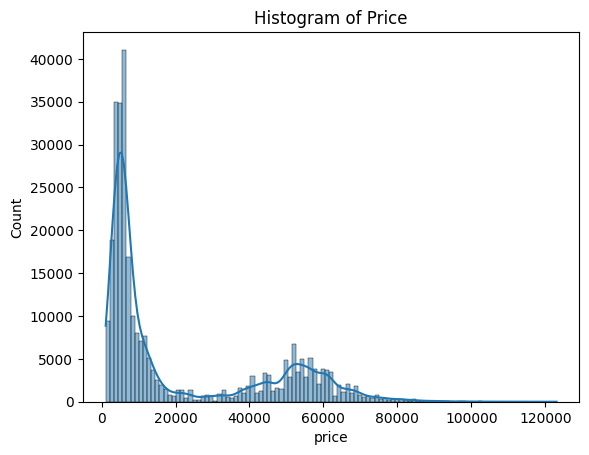

In [5]:
sns.histplot(x = 'price', data = df, kde = True)
plt.title("Histogram of Price")
plt.show()

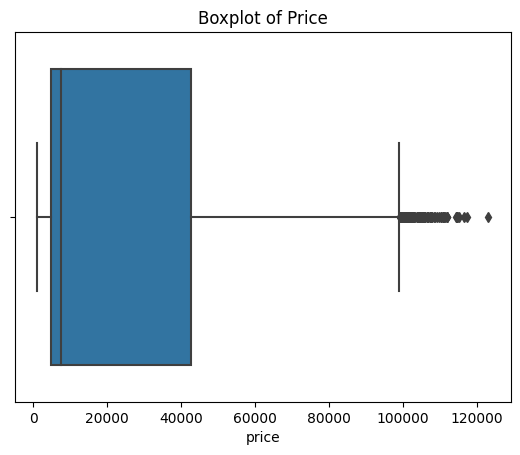

In [6]:
sns.boxplot(x = 'price', data = df)
plt.title("Boxplot of Price")
plt.show()

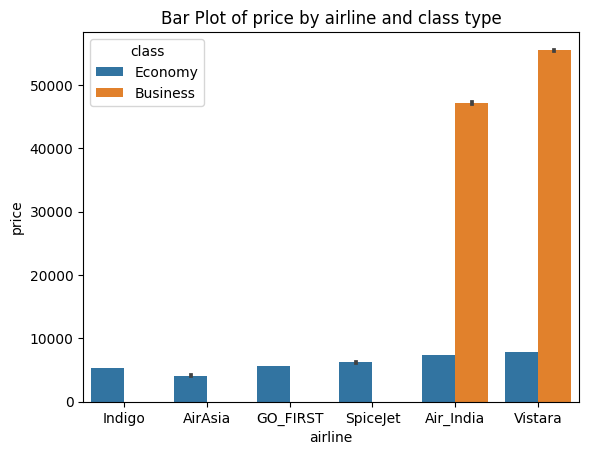

In [7]:
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price"))
plt.title("Bar Plot of price by airline and class type")
plt.show()

In [8]:
# Checking if price varies for airline

for class_name, group_df in df.groupby(['class','airline']):
    mean = group_df['price'].mean()
    median = group_df['price'].median()
    first_quartile = group_df['price'].quantile(0.25)
    third_quartile = group_df['price'].quantile(0.75)
    std = group_df['price'].std()
    print(f"Class: {class_name}, Mean: {mean:.2f}, First Quartile: {first_quartile:.2f}, Median: {median:.2f}, Third Quartile: {third_quartile:.2f}, Standard Deviation: {std:.2f}")


Class: ('Business', 'Air_India'), Mean: 47131.04, First Quartile: 42457.00, Median: 49613.00, Third Quartile: 54608.00, Standard Deviation: 10521.93
Class: ('Business', 'Vistara'), Mean: 55477.03, First Quartile: 49207.00, Median: 56588.00, Third Quartile: 62591.00, Standard Deviation: 13225.35
Class: ('Economy', 'AirAsia'), Mean: 4091.07, First Quartile: 2361.00, Median: 3276.00, Third Quartile: 4589.00, Standard Deviation: 2824.06
Class: ('Economy', 'Air_India'), Mean: 7313.68, First Quartile: 4556.00, Median: 6082.00, Third Quartile: 9135.00, Standard Deviation: 3989.52
Class: ('Economy', 'GO_FIRST'), Mean: 5652.01, First Quartile: 4205.00, Median: 5336.00, Third Quartile: 6324.00, Standard Deviation: 2513.87
Class: ('Economy', 'Indigo'), Mean: 5324.22, First Quartile: 3219.00, Median: 4453.00, Third Quartile: 6489.00, Standard Deviation: 3268.89
Class: ('Economy', 'SpiceJet'), Mean: 6179.28, First Quartile: 4197.00, Median: 5654.00, Third Quartile: 7412.00, Standard Deviation: 2999

Text(0.5, 1.0, 'Airline Company Prices for Business Tickets')

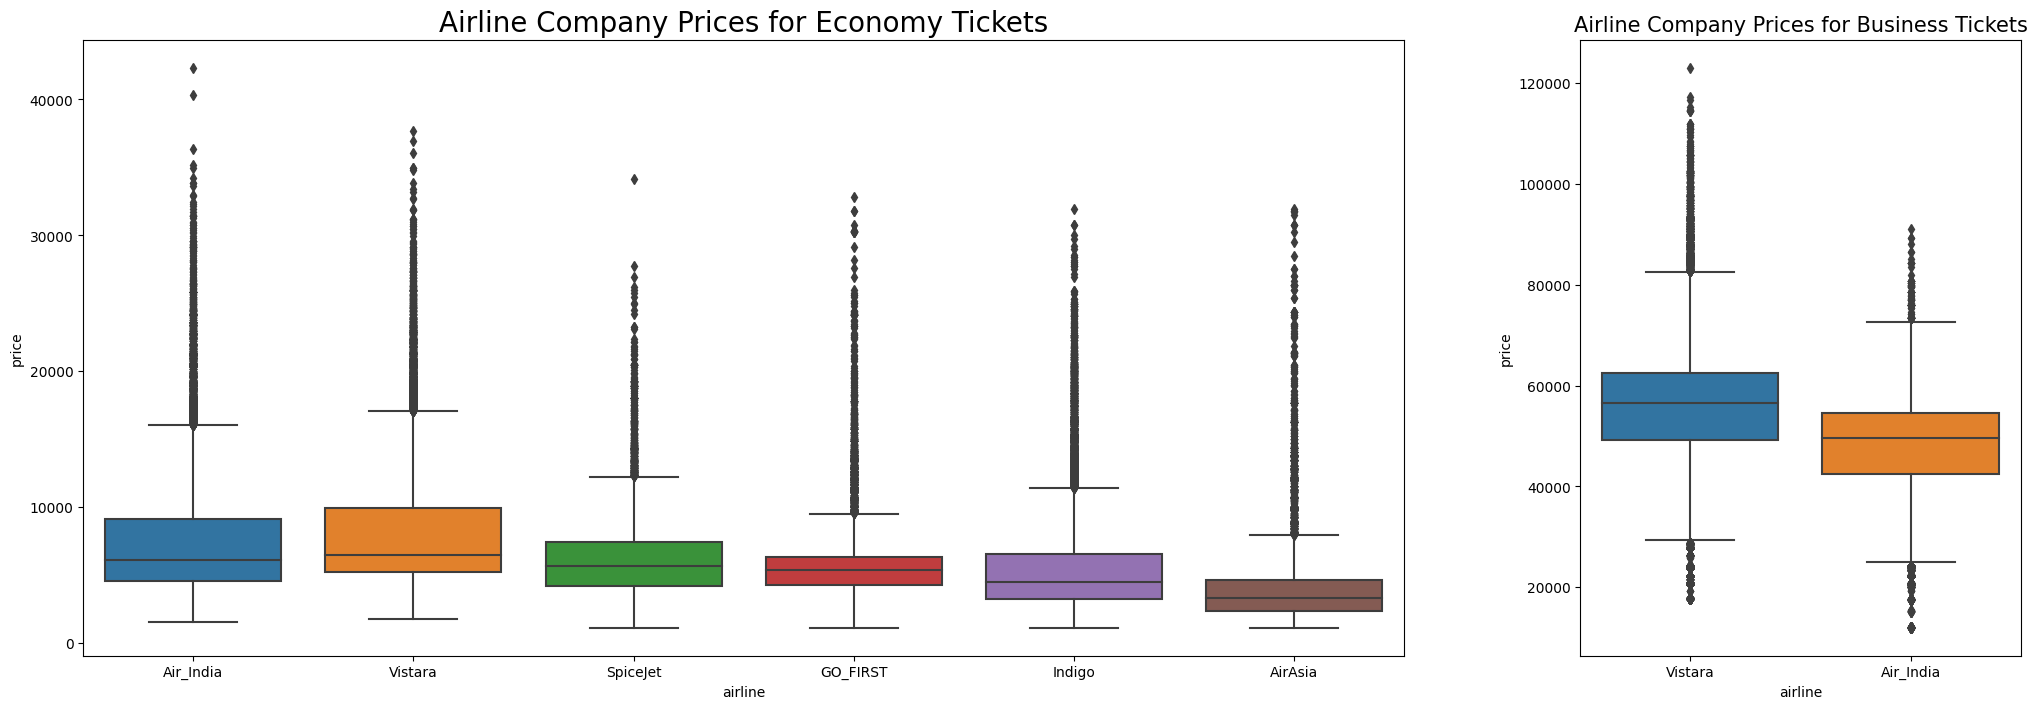

In [17]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [6, 2]}, figsize=(25, 8))
sns.boxplot( x = "airline",y = "price",data = df.loc[df["class"]=="Economy"].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline Company Prices for Economy Tickets",fontsize=20)

sns.boxplot(x = "airline",y = "price", data = df.loc[df["class"]=="Business"].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline Company Prices for Business Tickets",fontsize=15)

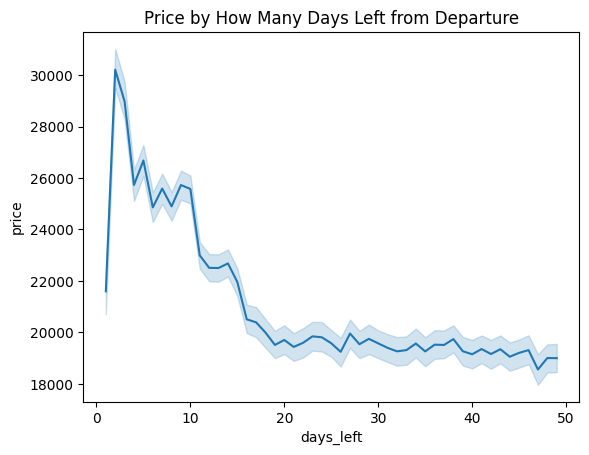

In [9]:
sns.lineplot(x=df["days_left"],y=df["price"])
plt.title("Price by How Many Days Left from Departure")
plt.show()

<ipython-input-19-557eb5b5436b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='days_bin', y='price', data=df, ci=None)


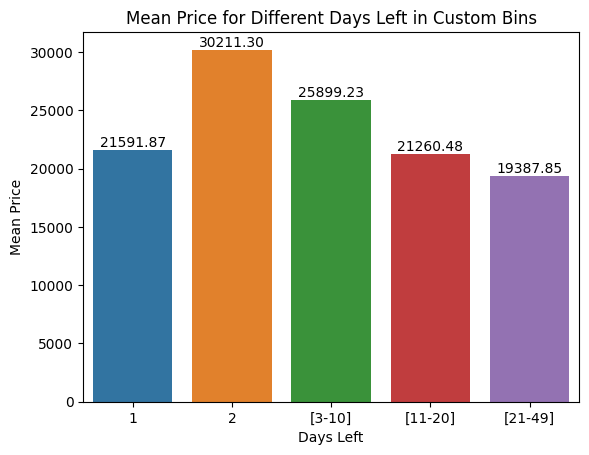

In [19]:
# Checking how much price changes when there are few days left from departure

bins = [0, 1, 2, 10, 20, 49]

df['days_bin'] = pd.cut(df['days_left'], bins=bins, labels=['1', '2', '[3-10]', '[11-20]', '[21-49]'])

ax = sns.barplot(x='days_bin', y='price', data=df, ci=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Days Left')
plt.ylabel('Mean Price')
plt.title('Mean Price for Different Days Left in Custom Bins')
plt.show()

Text(0.5, 1.0, 'Airline Company Prices Based on Departure Time for Business Tickets')

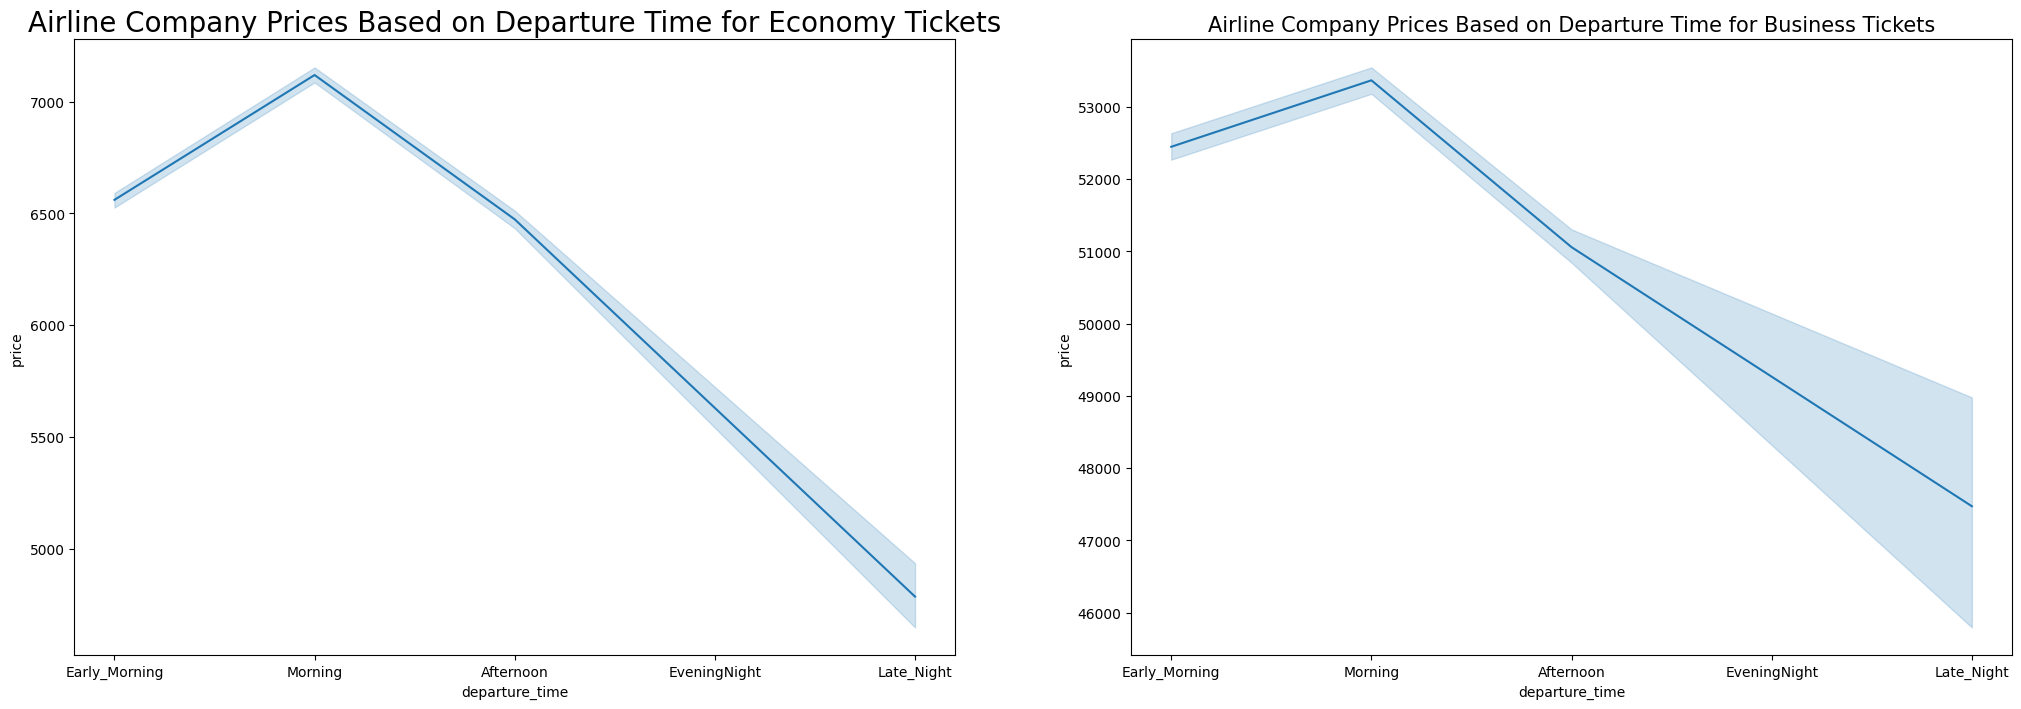

In [43]:
df2=df.copy()
custom_order = ['Early_Morning','Morning','Afternoon','Evening''Night','Late_Night']
df2['departure_time'] = pd.Categorical(df2['departure_time'], categories=custom_order, ordered=True)
df2 = df2.sort_values('departure_time')

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 5]}, figsize=(25, 8))
sns.lineplot(x="departure_time",y="price", data=df2.loc[df2["class"]=="Economy"], sort=False, ax=axs[0])
axs[0].set_title("Airline Company Prices Based on Departure Time for Economy Tickets",fontsize=20)

sns.lineplot(x="departure_time",y="price", data=df2.loc[df2["class"]=="Business"], sort=False, ax=axs[1])
axs[1].set_title("Airline Company Prices Based on Departure Time for Business Tickets",fontsize=15)

Text(0.5, 1.0, 'Airline Company Prices Based on Arrival Time for Business Tickets')

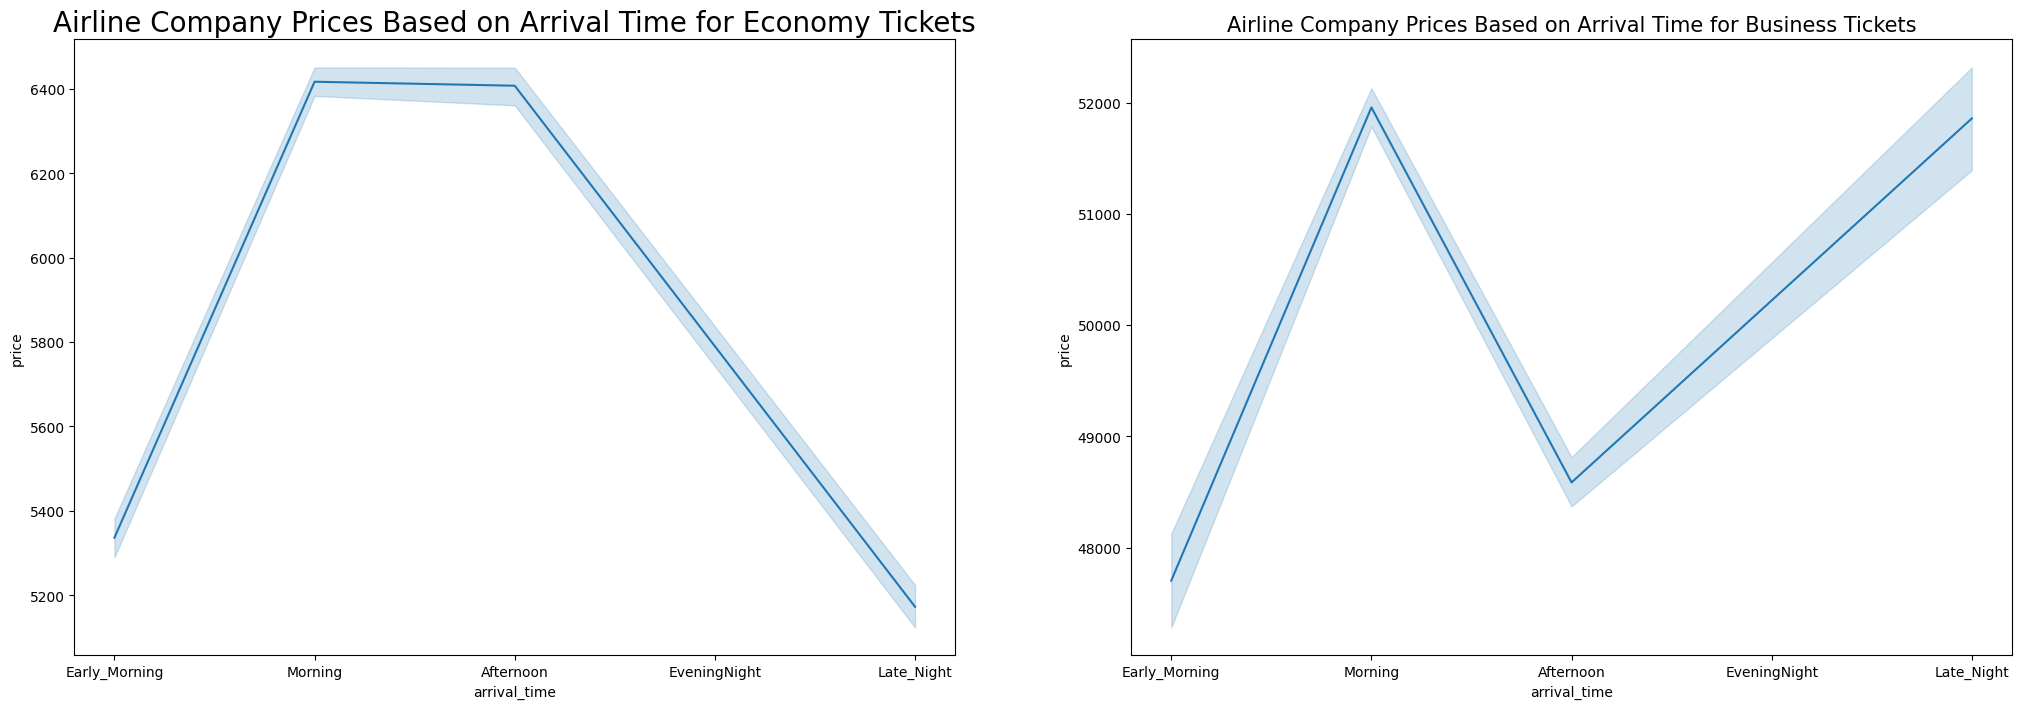

In [44]:
df2['arrival_time'] = pd.Categorical(df2['arrival_time'], categories=custom_order, ordered=True)
df2 = df2.sort_values('arrival_time')

fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 5]}, figsize=(25, 8))
sns.lineplot(x="arrival_time",y="price", data=df2.loc[df2["class"]=="Economy"], sort=False, ax=axs[0])
axs[0].set_title("Airline Company Prices Based on Arrival Time for Economy Tickets",fontsize=20)

sns.lineplot(x="arrival_time",y="price", data=df2.loc[df2["class"]=="Business"], sort=False, ax=axs[1])
axs[1].set_title("Airline Company Prices Based on Arrival Time for Business Tickets",fontsize=15)

Text(0.5, 1.0, 'Airline Company Prices Based on Source City for Business Tickets')

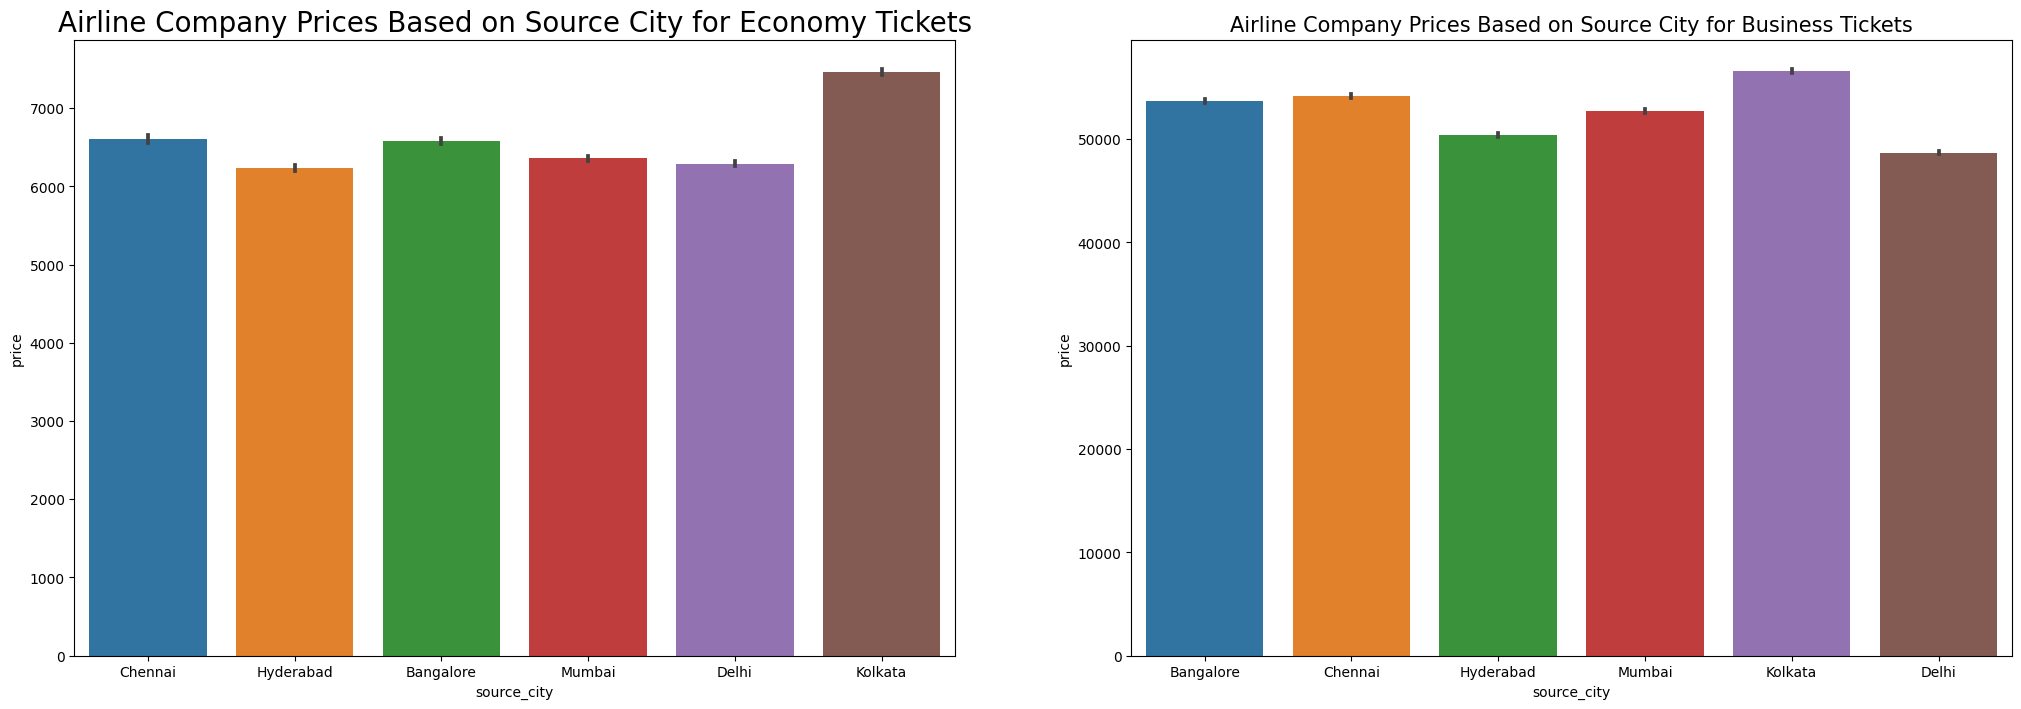

In [50]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 5]}, figsize=(25, 8))
sns.barplot(x='source_city',y='price',data=df.loc[df["class"]=="Economy"], ax=axs[0])
axs[0].set_title("Airline Company Prices Based on Source City for Economy Tickets",fontsize=20)

sns.barplot(x='source_city',y='price',data=df.loc[df["class"]=="Business"], ax=axs[1])
axs[1].set_title("Airline Company Prices Based on Source City for Business Tickets",fontsize=15)

In [11]:
df_temp = df.groupby(['class','source_city'],as_index=False).mean()
df_temp[['class','source_city','price']].sort_values('price')

<ipython-input-11-77ea1c17bc44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df.groupby(['class','source_city'],as_index=False).mean()


,class,source_city,price
9,Economy,Hyderabad,6235.770619
8,Economy,Delhi,6288.585423
11,Economy,Mumbai,6358.920050
6,Economy,Bangalore,6582.057019
7,Economy,Chennai,6606.279699
10,Economy,Kolkata,7458.632354
2,Business,Delhi,48697.983457
3,Business,Hyderabad,50370.466200
5,Business,Mumbai,52740.521251
0,Business,Bangalore,53723.539687


In [12]:
df_temp = df.groupby(['class','destination_city'],as_index=False).mean()
df_temp[['class','destination_city','price']].sort_values('price')

<ipython-input-12-4dbb492666df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df.groupby(['class','destination_city'],as_index=False).mean()


,class,destination_city,price
8,Economy,Delhi,6251.088579
9,Economy,Hyderabad,6305.544732
11,Economy,Mumbai,6459.578293
6,Economy,Bangalore,6618.316318
7,Economy,Chennai,6641.605072
10,Economy,Kolkata,7200.518058
2,Business,Delhi,48088.076914
3,Business,Hyderabad,50428.510128
5,Business,Mumbai,52866.332842
1,Business,Chennai,53617.092871


In [56]:
# Table of Economy Class Average Ticket Price according to Source and Destination City Ordered by Cheaper First

df_temp=df[df['class']=='Economy'].groupby(['source_city','destination_city'],as_index=False).mean()
df_temp[['source_city','destination_city','price']].sort_values('price')

<ipython-input-56-e05e4a8c0989>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp=df[df['class']=="Economy"].groupby(['source_city','destination_city'],as_index=False).mean()


,source_city,destination_city,price
28,Mumbai,Hyderabad,5774.891130
27,Mumbai,Delhi,5889.281400
7,Chennai,Hyderabad,5960.788831
19,Hyderabad,Mumbai,5969.259906
12,Delhi,Hyderabad,6031.164261
16,Hyderabad,Chennai,6049.884930
14,Delhi,Mumbai,6059.826087
17,Hyderabad,Delhi,6072.296659
6,Chennai,Delhi,6075.961190
11,Delhi,Chennai,6102.317245


In [57]:
# Table of Business Class Average Ticket Price according to Source and Destination City Ordered by Cheaper First

df_temp=df[df['class']=='Business'].groupby(['source_city','destination_city'],as_index=False).mean()
df_temp[['source_city','destination_city','price']].sort_values('price')

<ipython-input-57-e070105d958b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp=df[df['class']=="Business"].groupby(['source_city','destination_city'],as_index=False).mean()


,source_city,destination_city,price
27,Mumbai,Delhi,43846.329273
17,Hyderabad,Delhi,44250.700281
14,Delhi,Mumbai,44364.442811
12,Delhi,Hyderabad,44457.376775
1,Bangalore,Delhi,48144.337108
10,Delhi,Bangalore,48576.027921
15,Hyderabad,Bangalore,50358.290706
2,Bangalore,Hyderabad,50395.796948
16,Hyderabad,Chennai,51132.155288
7,Chennai,Hyderabad,51559.874283


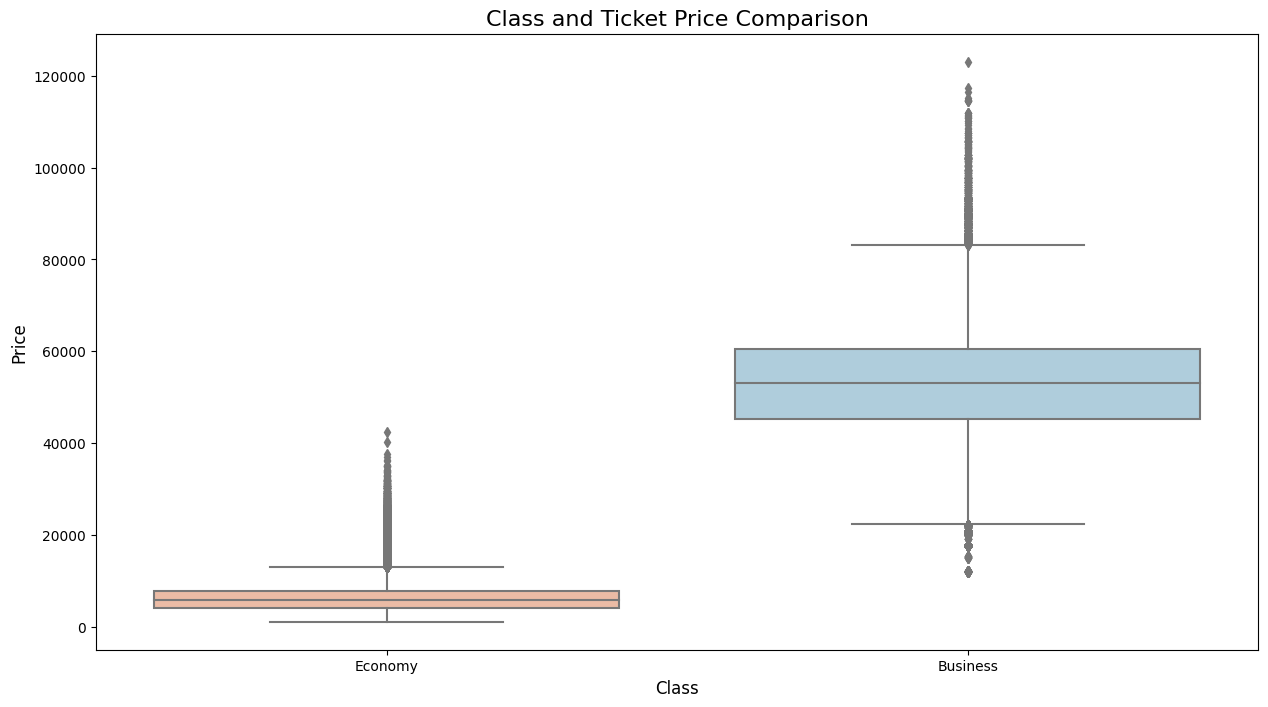

In [18]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='class',y='price',data=df,palette='RdBu')

plt.title('Class and Ticket Price Comparison',fontsize=16)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [10]:
# Checking how much price varies between class type

for class_name, group_df in df.groupby('class'):
    mean = group_df['price'].mean()
    median = group_df['price'].median()
    first_quartile = group_df['price'].quantile(0.25)
    third_quartile = group_df['price'].quantile(0.75)
    std = group_df['price'].std()
    print(f"Class: {class_name}, Mean: {mean:.2f}, First Quartile: {first_quartile:.2f}, Median: {median:.2f}, Third Quartile: {third_quartile:.2f}, Standard Deviation: {std:.2f}")


Class: Business, Mean: 52540.08, First Quartile: 45185.00, Median: 53164.00, Third Quartile: 60396.00, Standard Deviation: 12969.31
Class: Economy, Mean: 6572.34, First Quartile: 4173.00, Median: 5772.00, Third Quartile: 7746.00, Standard Deviation: 3743.52


# CONCLUSION OF EDA

a) Does price vary with Airlines?

Economy class average ticket price varies slightly between arlines. The cheapest airlines are AirAsia (\$4091.07) and Indigo (\$5324.22). The most expensive are Vistara (\$7806.94) and SpiceJet (\$6179.28). Business Class Ticket price are based only on 2 airlines, Vistara and Air India. Vistara is the most expensive (\$55477.03), 17.7% more expensive than Air India (\$47131.04)

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

When there are more than 20 days left, price doesn't vary much, but it increases the fewer are the days left until the last day before departure, when price decreases. This can be explained with airlines trying to fill empty seats right before departure. In just 1 day, from 2 days left, price decreases by about 30%.

c) Does ticket price change based on the departure time and arrival time?

Departure in the morning is the most expensive, the ticket price getting cheaper the later the flight time. Economy and business class have the same pattern, but late business class flights have more variation of price.

Arrival in the morning and in the afternoon are the most expensive for economy class, ticket prices getting cheaper the later the flight arrival, or if the arrival is in the early morning. However, business class ticket price is less expensive when the arrival is during afternoon, besided during early morning. It also gets more expensive the later the arrival time.

This can be explained by noting business hours ending in late afternoon, meaning the purpose of a visit would have to be deferred to the next day. Late arrivals being more expensive probably mean a morning depature, which is more expensive. Departure time and arrival time are correlated, of course.

d) How the price changes with change in Source and Destination?

For economy class ticket prices, flights from Hyderabad and Delhi are cheapest, with little variation except for flights from Kolkata, which are more expensive. For business class, flights from Delhi are the cheapest and from Kolkata the more expensive.

Flights to Delhi are the cheapest and to Kolkata the more expensive for economy and business class.

The cheapest route is Mumbai-Hyderabad and the most expensive is Kolkata-Chennai for economy class. For business class, the cheapest route is Mumbai-Delhi and the most expensive is Bangalore-Kolkata.

e) How does the ticket price vary between Economy and Business class?

Average business tickets are practically 8 times more expensive than economy tickets. Median prices of business class tickets are more than 9 times the price of economy class tickets. Business class ticket price can vary by 25%. Economy class ticket price can vary by 57%.

# DATA PREPROCESSING

In [9]:
# Transforming Labels into Numbers

le = LabelEncoder()

df_object = df.select_dtypes(include='object')

df_encode = df.copy()


df_encode[df_object.columns] = df_object.apply(lambda col: le.fit_transform(col))

In [10]:
# Defining Data to be Processed and Target for Prediction

X = df_encode.drop(['price'], axis=1)
y = df_encode['price']

In [11]:
# Dividing Dataset into tran and test parts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [12]:
# Scaling Data for better performance

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_tet = pd.DataFrame(X_test)

# MODEL TRAINING AND VALIDATION

In [8]:
# Defining Models for Initial Performance Assessment

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

results = []

In [9]:
# Training and Evaluating Models for Initial Performance Assessment

for model in models:
  start = time.time()
  score_r2 = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
  score_r2 = score_r2.mean()
  end = time.time()
  total_time = end - start
  result = {"Model": model.__class__.__name__, "R2 Score": score_r2, "Total Time": total_time}
  print(result)
  results.append(result)

results = pd.DataFrame(results)

{'Model': 'LinearRegression', 'R2 Score': 0.9046201765192214, 'Total Time': 1.2331912517547607}
{'Model': 'DecisionTreeRegressor', 'R2 Score': 0.9815150742140393, 'Total Time': 5.481303930282593}
{'Model': 'RandomForestRegressor', 'R2 Score': 0.9886314060925065, 'Total Time': 204.3348982334137}
{'Model': 'KNeighborsRegressor', 'R2 Score': 0.9709305132785223, 'Total Time': 38.074703216552734}
{'Model': 'GradientBoostingRegressor', 'R2 Score': 0.9574139130662779, 'Total Time': 60.2739622592926}
{'Model': 'XGBRegressor', 'R2 Score': 0.9826306869818636, 'Total Time': 3.9793429374694824}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 160081, number of used features: 10
[LightGBM] [Info] Start training from score 20892.390159


In [10]:
# Ordering the Results based on R2 Score

results.sort_values("R2 Score", ascending=False)

,Model,R2 Score,Total Time
2,RandomForestRegressor,0.988631,204.334898
5,XGBRegressor,0.982631,3.979343
1,DecisionTreeRegressor,0.981515,5.481304
6,LGBMRegressor,0.977453,5.374172
3,KNeighborsRegressor,0.970931,38.074703
4,GradientBoostingRegressor,0.957414,60.273962
0,LinearRegression,0.904620,1.233191


The Top 2 best models in the Initial Performance Assessment were Random Forest and XGBoost Regressor Algorithms. Therefore, they were the chosen for the Hyperparameter Tuning step.

# HYPERPARAMETER TUNING

In [12]:
results_random_search = []

In [18]:
# Defining the function for Random Search for Optimal Parameters Based on best R2 Score

def random_search_and_eval(model,param_dist,n_iter):

  random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter,
    cv=3,
    scoring="r2",
    random_state=42,
    n_jobs=-1
  )
  random_search.fit(X_train, y_train)

  # Evaluate model, print and save results
  print("Best Parameters:", random_search.best_params_)
  print("Best Score:", random_search.best_score_)
  y_pred = random_search.best_estimator_.predict(X_test)
  result = {"Model": model.__class__.__name__, "Best Score": random_search.best_score_,"Best Parameters": random_search.best_params_}
  print(result)
  results_random_search.append(result)

In [20]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor()

n_iter = 50

random_search_and_eval(rf_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 170}
Best Score: 0.9857437368643756
{'Model': 'RandomForestRegressor', 'Best Score': 0.9857437368643756, 'Best Parameters': {'bootstrap': True, 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 170}}


In [21]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(1, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_model = XGBRegressor()

n_iter = 200

random_search_and_eval(xgb_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.8186157898947435, 'gamma': 0.9805768001799882, 'learning_rate': 0.2810091437908075, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 194, 'reg_alpha': 0.18057534512733353, 'reg_lambda': 0.5679452305526295, 'subsample': 0.9577441487940209}
Best Score: 0.9901063064166534
{'Model': 'XGBRegressor', 'Best Score': 0.9901063064166534, 'Best Parameters': {'colsample_bytree': 0.8186157898947435, 'gamma': 0.9805768001799882, 'learning_rate': 0.2810091437908075, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 194, 'reg_alpha': 0.18057534512733353, 'reg_lambda': 0.5679452305526295, 'subsample': 0.9577441487940209}}


In [22]:
results_random_search

[{'Model': 'RandomForestRegressor',
  'Best Score': 0.9857437368643756,
  'Best Parameters': {'bootstrap': True,
   'max_depth': 16,
   'max_features': 'auto',
   'min_samples_leaf': 9,
   'min_samples_split': 5,
   'n_estimators': 170}},
 {'Model': 'XGBRegressor',
  'Best Score': 0.9901063064166534,
  'Best Parameters': {'colsample_bytree': 0.8186157898947435,
   'gamma': 0.9805768001799882,
   'learning_rate': 0.2810091437908075,
   'max_depth': 9,
   'min_child_weight': 7,
   'n_estimators': 194,
   'reg_alpha': 0.18057534512733353,
   'reg_lambda': 0.5679452305526295,
   'subsample': 0.9577441487940209}}]

In [36]:
results_random_search = pd.DataFrame(results_random_search)
results_random_search

,Model,Best Score,Best Parameters
0,RandomForestRegressor,0.985744,"{'bootstrap': True, 'max_depth': 16, 'max_feat..."
1,XGBRegressor,0.990106,"{'colsample_bytree': 0.8186157898947435, 'gamm..."


XGBoost Regressor had the best performance (99.01%), so it was chosen for refinement of parameters by using Grid Seach.

In [25]:
results_grid_search = []

In [26]:
def grid_search_and_eval(model, param_grid):

  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid,
      cv=3,
      scoring="r2",
      n_jobs=-1
  )

  # Fit the model to find the best parameters
  grid_search.fit(X_train, y_train)

  # Evaluate model, print and save results
  print("Best Parameters:", grid_search.best_params_)
  print("Best Score:", grid_search.best_score_)
  y_pred = grid_search.best_estimator_.predict(X_test)
  result = {"Model": model.__class__.__name__, "Best Score": grid_search.best_score_,"Best Parameters": grid_search.best_params_}
  print(result)
  results_grid_search.append(result)

In [38]:
best_params = results_random_search.loc[1, "Best Parameters"]

param_grid = {
    'n_estimators': [best_params['n_estimators'], best_params['n_estimators'] + 10],
    'learning_rate': [best_params['learning_rate'], best_params['learning_rate'] * 1.1],
    'max_depth': [best_params['max_depth'], best_params['max_depth'] + 1],
    'min_child_weight': [best_params['min_child_weight'], best_params['min_child_weight'] + 1],
    'subsample': [best_params['subsample'], best_params['subsample'] * 1.1],
    'colsample_bytree': [best_params['colsample_bytree'], best_params['colsample_bytree'] * 1.1],
    'gamma': [best_params['gamma'], best_params['gamma'] * 1.1],
    'reg_alpha': [best_params['reg_alpha'], best_params['reg_alpha'] * 1.1],
    'reg_lambda': [best_params['reg_lambda'], best_params['reg_lambda'] * 1.1]
}

xgb_model = XGBRegressor()

grid_search_and_eval(xgb_model,param_grid)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
768 fits failed out of a total of 1536.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
768 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_

Best Parameters: {'colsample_bytree': 0.9004773688842179, 'gamma': 0.9805768001799882, 'learning_rate': 0.2810091437908075, 'max_depth': 10, 'min_child_weight': 7, 'n_estimators': 204, 'reg_alpha': 0.1986328796400669, 'reg_lambda': 0.6247397536078925, 'subsample': 0.9577441487940209}
Best Score: 0.990933658123975
{'Model': 'XGBRegressor', 'Best Score': 0.990933658123975, 'Best Parameters': {'colsample_bytree': 0.9004773688842179, 'gamma': 0.9805768001799882, 'learning_rate': 0.2810091437908075, 'max_depth': 10, 'min_child_weight': 7, 'n_estimators': 204, 'reg_alpha': 0.1986328796400669, 'reg_lambda': 0.6247397536078925, 'subsample': 0.9577441487940209}}


In [39]:
results_grid_search

[{'Model': 'XGBRegressor',
  'Best Score': 0.990933658123975,
  'Best Parameters': {'colsample_bytree': 0.9004773688842179,
   'gamma': 0.9805768001799882,
   'learning_rate': 0.2810091437908075,
   'max_depth': 10,
   'min_child_weight': 7,
   'n_estimators': 204,
   'reg_alpha': 0.1986328796400669,
   'reg_lambda': 0.6247397536078925,
   'subsample': 0.9577441487940209}}]

The best R2 Score was 99.09%. Now comes the final test, using cross validation to train the equivalent of the entire dataset.

# FINAL ASSESSMENT

In [13]:
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

final_model = XGBRegressor(colsample_bytree = 0.9004773688842179,
   gamma = 0.9805768001799882,
   learning_rate = 0.2810091437908075,
   max_depth = 10,
   min_child_weight = 7,
   n_estimators = 204,
   reg_alpha = 0.1986328796400669,
   reg_lambda = 0.6247397536078925,
   subsample = 0.9577441487940209,
   random_state= 42)

final_y_pred = cross_val_predict(final_model, X, y, cv=kf)
final_r2_score = r2_score(y,final_y_pred)
print(f"Final R2 Score: {final_r2_score}")

Final R2 Score: 0.9921268518195765


The R2 Score was 99.21%, an improvement of the Score based on training dataset and validated by 20% of the original dataset.

In [14]:
# MErging of the results to a copy of the original dataset

df_copy = df.copy()
merged_df = pd.merge(df_copy, pd.DataFrame({'Actual_Price': y, 'Predicted_Price': final_y_pred}),
                     left_index=True, right_index=True)

merged_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual_Price,Predicted_Price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5953,9506.478516
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5953,6017.649902
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,5956,6306.934570
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,5955,6000.388184
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5955,4391.875488


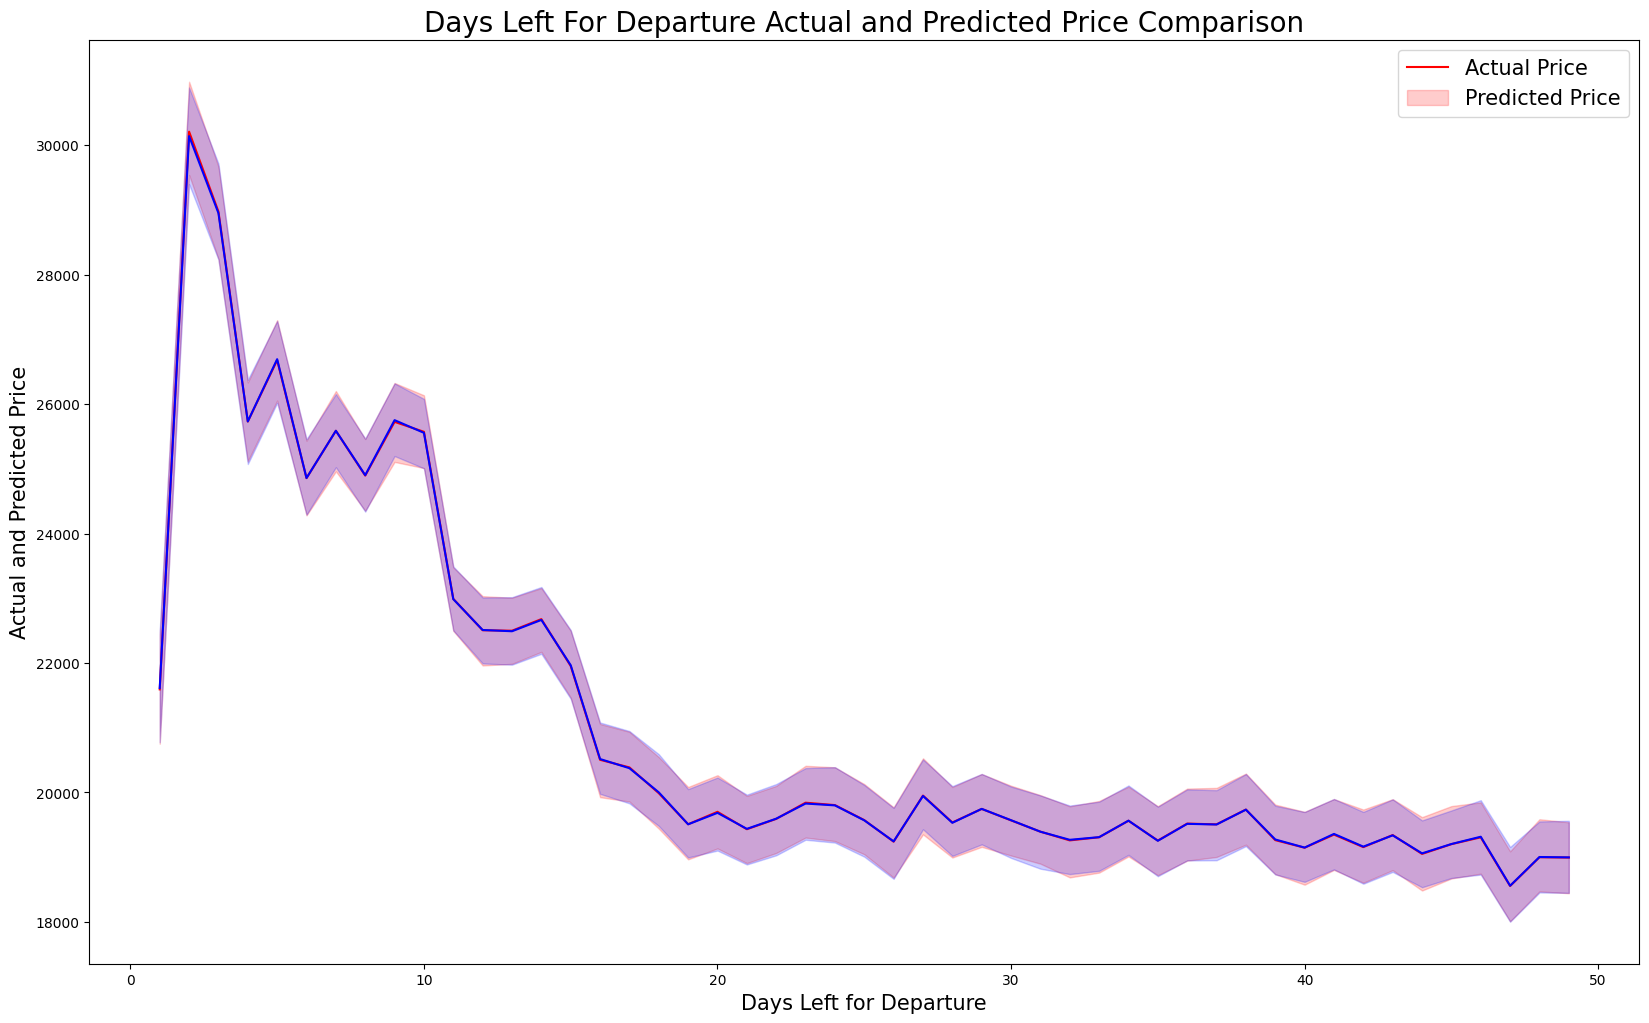

In [17]:
# Final Visualization Comparing Actual and Predicted Price using Days Left from Departure Column

plt.figure(figsize=(20,12))
sns.lineplot(x='days_left',y='Actual_Price',data=merged_df, color='red')
sns.lineplot(x='days_left',y='Predicted_Price', data=merged_df, color='blue')
plt.title('Days Left For Departure Actual and Predicted Price Comparison',fontsize=20)
plt.legend(labels=['Actual Price','Predicted Price'],fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

# CONCLUSION

The best model Was XGBoost Regressor with a R2 Score of 99.21%, which is a very good result.